In [ ]:
import pandas as pd
import numpy as np
import ast
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, Concatenate, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Step 2: Load the HUBERT features and moods from CSV
df_2 = pd.read_csv('./final hubert_song_features_for 750 window size.csv')
if df_2.empty:
    print("Error: DataFrame is empty. Check if the CSV file exists and is not empty.")
else:
    print("DataFrame loaded successfully.")

# Step 3: Convert the feature vectors from string representation to lists

#song_data_array_2 will now contain HUBERT features without mood labels in a numpy array. The column is named as 'mert_feature_vector' but it contains HUBERT features only.
song_data_2 = df_2['mert_feature_vector'].apply(ast.literal_eval)
song_data_array_2 = np.array(song_data_2.tolist())

# Convert the mood_labels to integers (ensure they are in integer format)
mood_labels = df_2['mood'].values.astype(int)

# Confirm the conversion
print(f"Converted mood_labels to integers: {mood_labels[:5]}")  # Show first 5 values to confirm conversion

# Step 1: Define the input shapes
hubert_input = Input(shape=(30, 1024))  # 30 segments, each of length 1024 for HUBERT

# Step 2: Apply Bidirectional LSTM on both MERT and HUBERT inputs
hubert_lstm = Bidirectional(LSTM(512, return_sequences=False))(hubert_input)

# Step 6: Add Feed-forward layers
dense_1 = Dense(512, activation='relu')(hubert_lstm)
dense_2 = Dense(256, activation='relu')(dense_1)

# Step 7: Output layer for classification (assuming 4 classes for mood)
output = Dense(4, activation='softmax')(dense_2)

# Step 8: Create the model
model = Model(inputs=hubert_input, outputs=output)

# Step 9: Compile the model using sparse categorical cross-entropy
optimizer = Adam(learning_rate=0.001)

# Step 10: Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

X_hubert_train = song_data_array_2

# Step 12: Setup learning rate scheduler and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Step 13: Train the model
history = model.fit(
    X_hubert_train, mood_labels,
    epochs=15,
    batch_size=32
)


DataFrame loaded successfully.
Converted mood_labels to integers: [0 0 0 0 0]


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 30, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 1024)                │       6,295,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,952,708 (26.52 MB)

 Trainable params: 6,952,708 (26.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.2248 - loss: 1.5789
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.2635 - loss: 1.4715
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.2441 - loss: 1.4893
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.2806 - loss: 1.4147
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.3258 - loss: 1.3571
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.4165 - loss: 1.2795
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.3810 - loss: 1.2413
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.4544 - loss: 1.1655
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.4285 - loss: 1.1665
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.4409 - loss: 1.1561
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.3937 - loss: 1.2664
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.3222 - lo

In [ ]:
import pandas as pd
import numpy as np
import ast
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load the HUBERT test features and moods from the test CSV
df_2_test = pd.DataFrame(columns=['mert_feature_vector', 'mood'])  # Initialize DataFrame
df_2_test = pd.read_csv('./test hubert_song_features_for 750 window size.csv')
if df_2_test.empty:
    print("Error: DataFrame is empty. Check if the CSV file exists and is not empty.")
else:
    print("Test DataFrame loaded successfully.")

#Shuffling the test features
df_2_test = df_2_test.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 3: Convert the feature vectors from string representation to lists for both MERT and HUBERT
song_data_2_test = df_2_test['mert_feature_vector'].apply(ast.literal_eval)
song_data_array_2_test = np.array(song_data_2_test.tolist())

# Step 4: Prepare the test data (inputs for the model)
X_hubert_test = song_data_array_2_test  # Test HUBERT features

# Print shapes of the input data to check for mismatch
print(f"Shape of X_hubert_test: {X_hubert_test.shape}")

# Step 5: Extract true labels
y_true = df_2_test['mood'].values.astype(int)

# Confirm the conversion
print(f"Converted mood_labels to integers: {y_true[:5]}")  # Show first 5 values to confirm conversion
  # Extracting true mood labels for evaluation
print(f"Shape of y_true: {y_true.shape}")  # Check shape of the true labels

# Step 6: Make predictions using the trained model
# Check the model input structure
print(f"Expected model input structure: {model.input_shape}")

# Predict
predictions = model.predict(X_hubert_test)

# Step 7: Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Step 8: Calculate and print metrics
# Accuracy
accuracy = accuracy_score(y_true, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, F1 Score
precision = precision_score(y_true, predicted_classes, average='weighted')
recall = recall_score(y_true, predicted_classes, average='weighted')
f1 = f1_score(y_true, predicted_classes, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, predicted_classes, target_names=['Mood 0', 'Mood 1', 'Mood 2', 'Mood 3']))
print(y_true)

Test DataFrame loaded successfully.
Shape of X_hubert_test: (45, 30, 1024)
Converted mood_labels to integers: [3 2 2 3 3]
Shape of y_true: (45,)
Expected model input structure: (None, 30, 1024)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step
Accuracy: 0.4444
Precision: 0.4632
Recall: 0.4444
F1 Score: 0.4206

Classification Report:
              precision    recall  f1-score   support

      Mood 0       0.25      0.10      0.14        10
      Mood 1       0.53      0.82      0.64        11
      Mood 2       0.71      0.38      0.50        13
      Mood 3       0.29      0.45      0.36        11

    accuracy                           0.44        45
   macro avg       0.45      0.44      0.41        45
weighted avg       0.46      0.44      0.42        45

[3 2 2 3 3 3 0 1 0 0 0 2 2 1 1 1 3 1 0 1 3 2 2 0 2 2 0 1 2 0 3 2 0 3 2 3 1
 2 1 3 1 0 1 2 3]


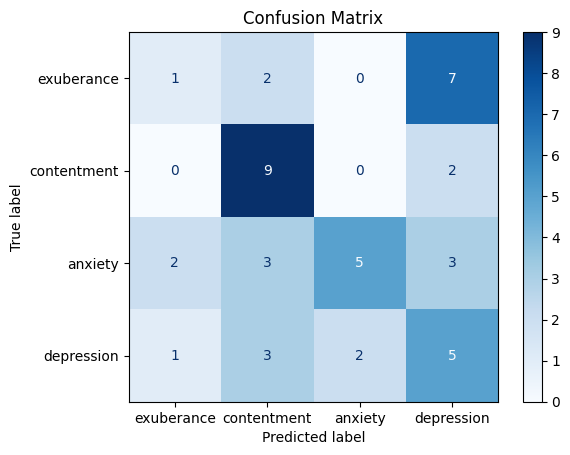

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, predicted_classes)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['exuberance', 'contentment', 'anxiety', 'depression'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()